In [ ]:
""" Code for plotting Fig 5 and Supp Fig 17: Trained ControlNet model predictions on test set """

In [ ]:
# import libraries 
import glob, re
from PIL import Image
import matplotlib.pyplot as plt
import os

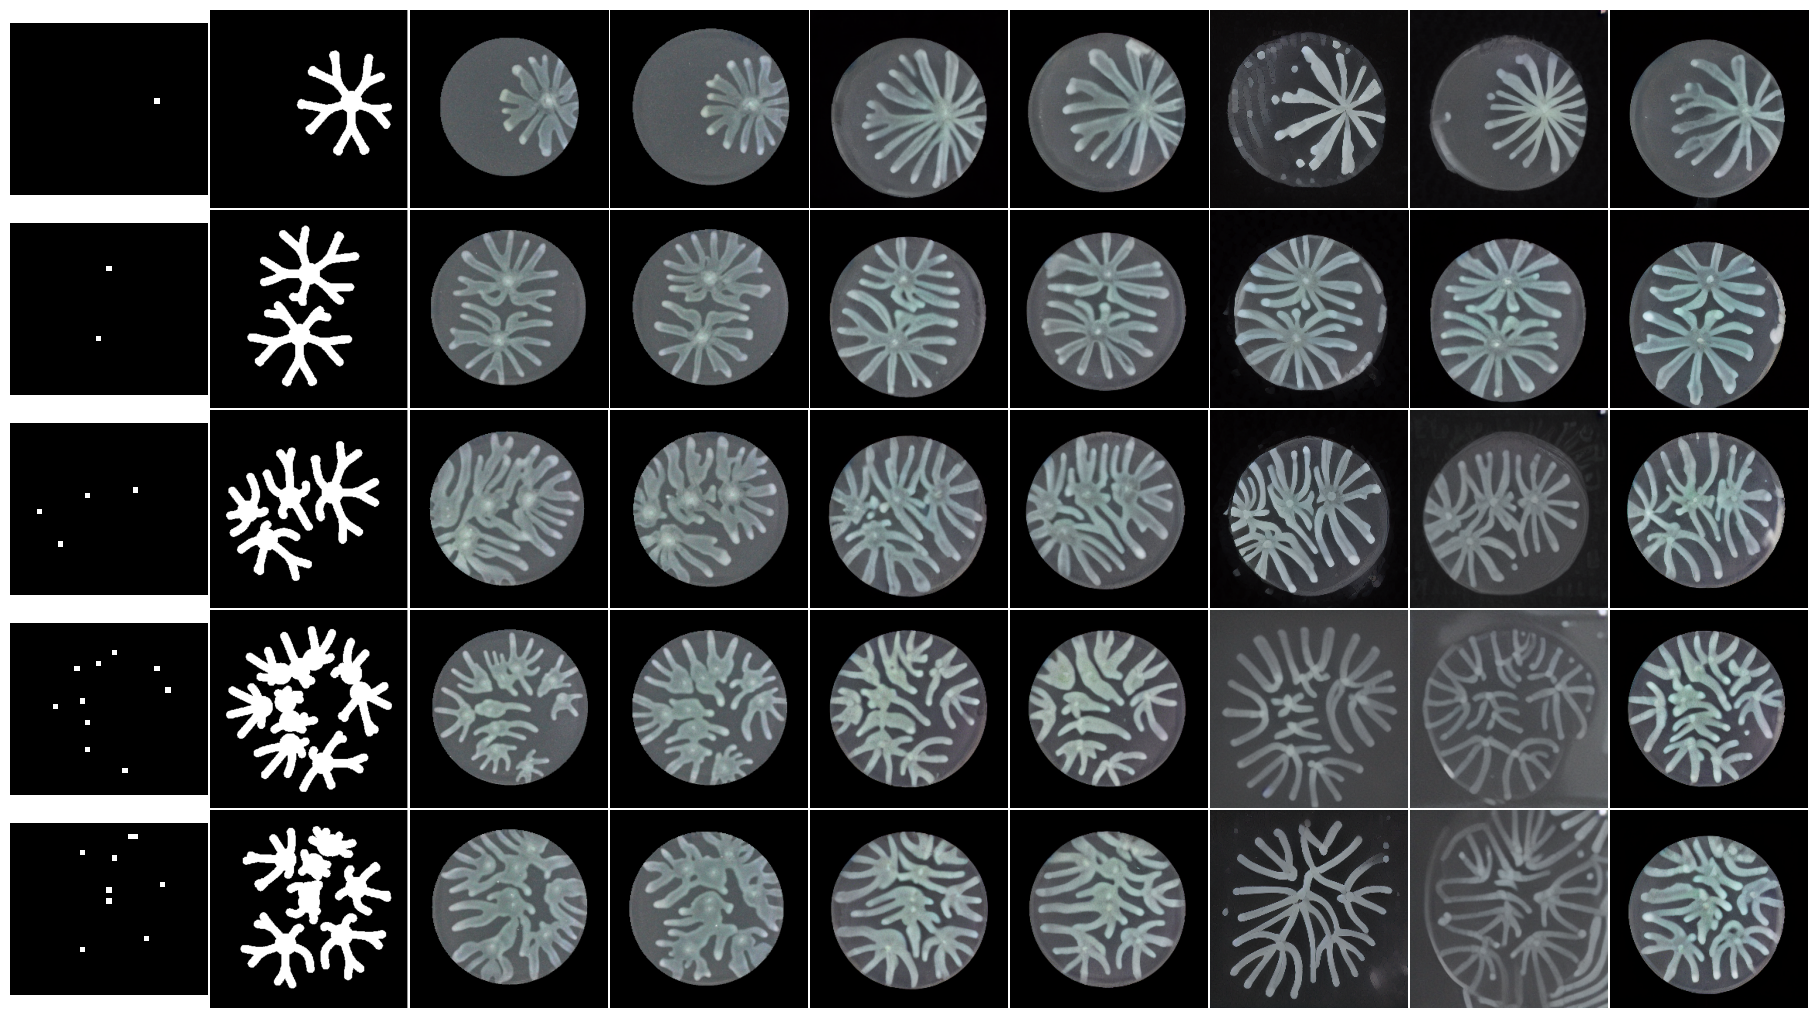

In [ ]:

"""
Display the predicted images from the trained ControlNet model here on the test set
contains more samples images than used in Fig 5 
"""

# ——— CONFIG ———
sample_ids = [198, 196, 200,227,245]   # your conditions
n_exp    = 2                   # number of real-exp replicates
n_pred   = 5                   # number of model samples per condition

folders = {
    "seed": "/hpc/group/youlab/ks723/storage/MATLAB_SIMS/Sim_031524/Sim_output/",           # e.g. “seed/196.png”
    "sim":  "/hpc/group/youlab/ks723/storage/MATLAB_SIMS/Sim_031524/Final_Test_set/",            # e.g. “sim/196.png”
    "exp":  "/hpc/group/youlab/ks723/storage/Exp_images/Final_Test_set_preprocess/",            # e.g. “exp/196_1.png”…“exp/196_2.png”
    # "pred": "/hpc/dctrl/ks723/inference/Generated_202552_327_simtoexp/"            # e.g. “pred/196_1.png”…“pred/196_5.png”
    # "pred":"/hpc/dctrl/ks723/inference/v2025513_20_simtoexp/"
    "pred": '/hpc/dctrl/ks723/inference/v2025513_163_simtoexp/'
}

# ——— GATHER PATHS ———

# SEED PATHS
seed_paths = {}
for sid in sample_ids:
    m = glob.glob(f"{folders['seed']}Input_{sid}.png")
    if not m:
        raise FileNotFoundError(f"No seed for sample {sid}")
    seed_paths[sid] = m[0]
# SIM PATHS (just take the first sim file, e.g. 196_1.png)
sim_paths = {}
for sid in sample_ids:
    sims = glob.glob(f"{folders['sim']}{sid}_*.TIF")
    if not sims:
        raise FileNotFoundError(f"No sim for sample {sid}")
    sim_paths[sid] = sorted(
        sims,
        key=lambda f: int(re.search(rf"{sid}_(\d+)\.TIF", f).group(1))
    )[0]

# EXPERIMENTAL REPLICATES
# updated replicate loader to handle both .tif and .png


def sorted_reps(folder, sid, ext, n):
    files = glob.glob(f"{folder}{sid}_*.{ext}")
    return sorted(
        files,
        key=lambda f: int(re.search(rf"{sid}_(\d+)\.{ext}", f).group(1))
    )[:n]


# Prediction
def sorted_reps_pred(folder, sid, n):
    # grab any “<sid>_*_*.png”
    pattern = os.path.join(folder, f"{sid}_*")
    files = [f for f in glob.glob(pattern) if f.lower().endswith('.png')]
    # sort by the final number after the last underscore
    files = sorted(files, key=lambda f: int(os.path.splitext(f)[0].split('_')[-1]))
    return files[:n]

exp_paths  = {sid: sorted_reps(folders['exp'],  sid, 'TIF', n_exp)  for sid in sample_ids}
pred_paths  = {sid: sorted_reps_pred(folders['pred'],  sid, n_pred)  for sid in sample_ids}

# PLOT
ncols = 2 + n_exp + n_pred
fig, axes = plt.subplots(
    len(sample_ids), ncols,
    figsize=(ncols*2, len(sample_ids)*2),
    layout='constrained',
)

for i, sid in enumerate(sample_ids):
    # seed
    seed_img = Image.open(seed_paths[sid]) \
               .convert('L') \
            #    .resize((256, 256))
    axes[i,0].imshow(seed_img,cmap='gray'); axes[i,0].axis('off')
    # if i==0: axes[i,0].set_title('Seed')
    # sim
    axes[i,1].imshow(Image.open(sim_paths[sid])); axes[i,1].axis('off')
    # if i==0: axes[i,1].set_title('Sim')
    # real-exp replicates
    for j, path in enumerate(exp_paths[sid]):
        ax = axes[i, 2+j]
        ax.imshow(Image.open(path)); ax.axis('off')
        # if i==0: ax.set_title(f"Exp {j+1}")
    # model predictions
    for k, path in enumerate(pred_paths[sid]):
        ax = axes[i, 2+n_exp+k]
        ax.imshow(Image.open(path)); ax.axis('off')
        # if i==0: ax.set_title(f"Pred {k+1}")

fig.get_layout_engine().set(w_pad=0.01, h_pad=0.01, hspace=0.01,
                            wspace=0.01)
plt.show()

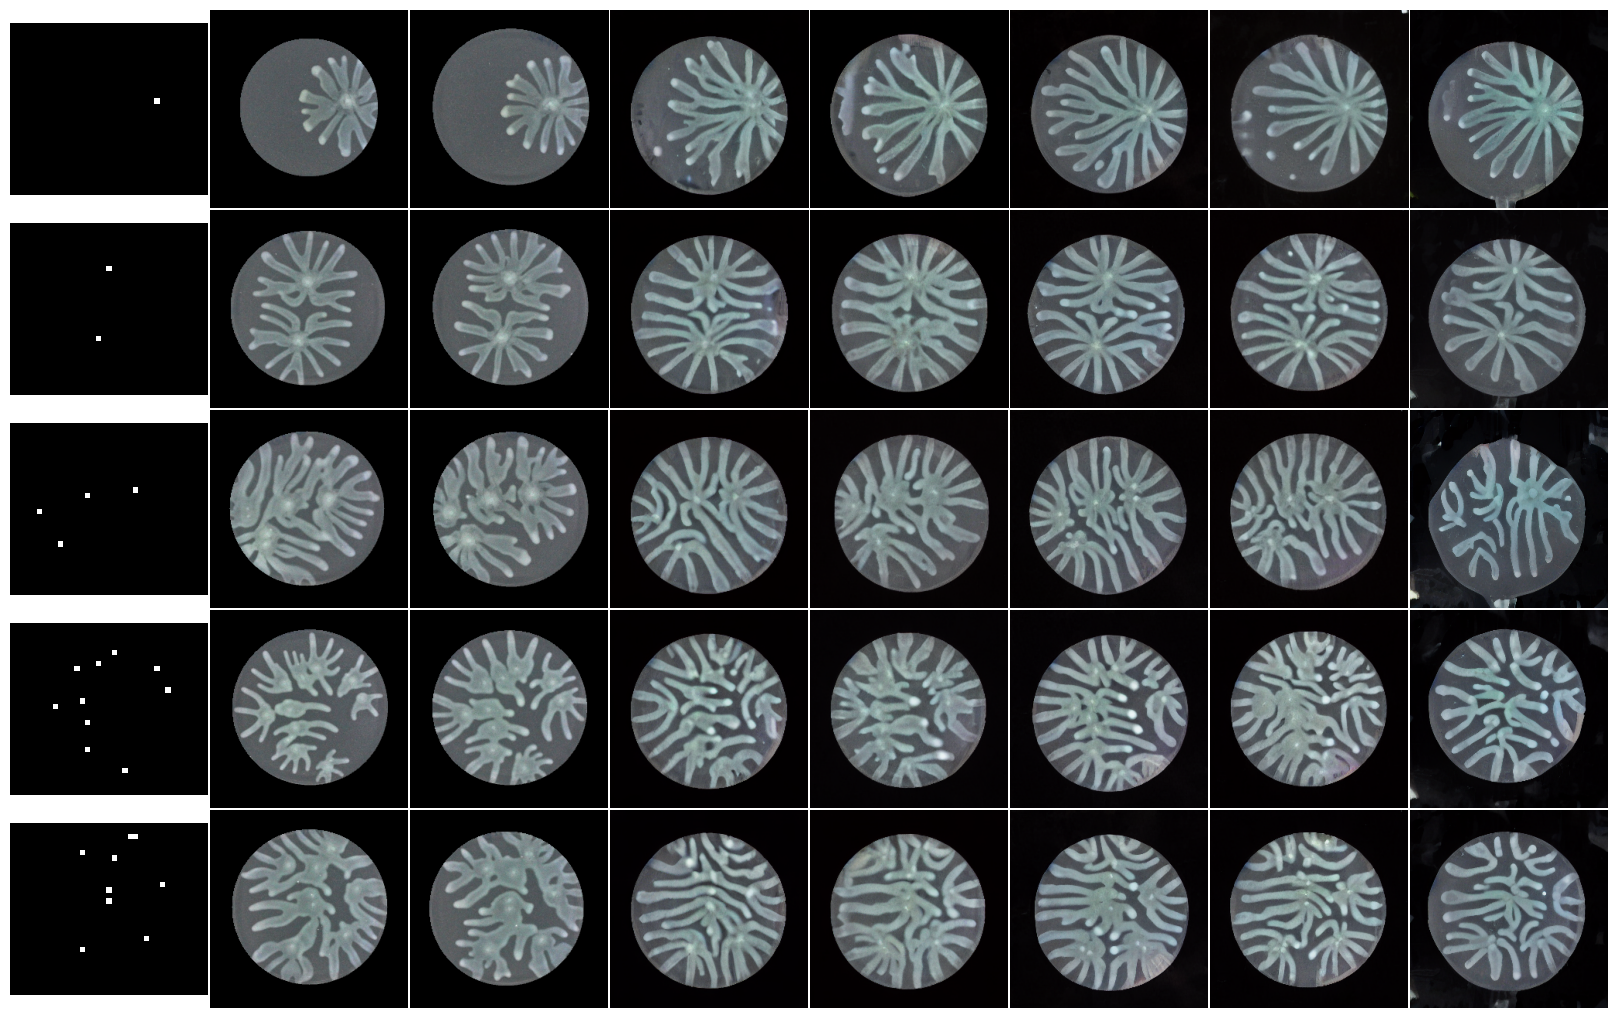

In [ ]:
"""Supp Fig 17: Predictions for ControlNet model conditioned with seed images on test set"""

# ——— CONFIG ———
sample_ids = [198, 196, 200,227,245]   # your conditions
n_exp    = 2                   # number of real-exp replicates
n_pred   = 5                   # number of model samples per condition

folders = {
    "seed": "/hpc/group/youlab/ks723/storage/MATLAB_SIMS/Sim_031524/Sim_output/",           # e.g. “seed/196.png"
    "exp":  "/hpc/group/youlab/ks723/storage/Exp_images/Final_Test_set_preprocess/",            # e.g. “exp/196_1.png”…“exp/196_2.png”
    "pred": '/hpc/dctrl/ks723/inference/v2025821_156_seedtoexp/'
}

# ——— GATHER PATHS ———

# SEED PATHS
seed_paths = {}
for sid in sample_ids:
    m = glob.glob(f"{folders['seed']}Input_{sid}.png")
    if not m:
        raise FileNotFoundError(f"No seed for sample {sid}")
    seed_paths[sid] = m[0]


# EXPERIMENTAL REPLICATES

# updated replicate loader to handle both .tif and .png


def sorted_reps(folder, sid, ext, n):
    files = glob.glob(f"{folder}{sid}_*.{ext}")
    return sorted(
        files,
        key=lambda f: int(re.search(rf"{sid}_(\d+)\.{ext}", f).group(1))
    )[:n]


# Prediction
def sorted_reps_pred(folder, sid, n):
    # grab any “<sid>_*_*.png”
    pattern = os.path.join(folder, f"{sid}_*")
    files = [f for f in glob.glob(pattern) if f.lower().endswith('.png')]
    # sort by the final number after the last underscore
    files = sorted(files, key=lambda f: int(os.path.splitext(f)[0].split('_')[-1]))
    return files[:n]

exp_paths  = {sid: sorted_reps(folders['exp'],  sid, 'TIF', n_exp)  for sid in sample_ids}
pred_paths  = {sid: sorted_reps_pred(folders['pred'],  sid, n_pred)  for sid in sample_ids}

# PLOT
ncols = 1 + n_exp + n_pred
fig, axes = plt.subplots(
    len(sample_ids), ncols,
    figsize=(ncols*2, len(sample_ids)*2),
    layout='constrained',
)

for i, sid in enumerate(sample_ids):
    # seed
    seed_img = Image.open(seed_paths[sid]) \
               .convert('L') \
            #    .resize((256, 256))
    axes[i,0].imshow(seed_img,cmap='gray'); axes[i,0].axis('off')
    
    for j, path in enumerate(exp_paths[sid]):
        ax = axes[i, 1+j]
        ax.imshow(Image.open(path)); ax.axis('off')
        # if i==0: ax.set_title(f"Exp {j+1}")
    # model predictions
    for k, path in enumerate(pred_paths[sid]):
        ax = axes[i, 1+n_exp+k]
        ax.imshow(Image.open(path)); ax.axis('off')
        # if i==0: ax.set_title(f"Pred {k+1}")

fig.get_layout_engine().set(w_pad=0.01, h_pad=0.01, hspace=0.01,
                            wspace=0.01)
plt.show()